In [2]:
#Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
#Veiri çekiyoruz
data1=pd.read_csv("Ads_CTR_Optimisation.csv")
#liste1=[]
#toplam=0

Toplam Odul:
2231


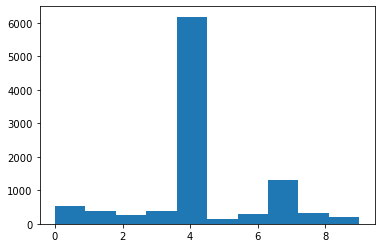

In [7]:
import math
#UCB (ÜST GÜVEN ARALIĞI)
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(n)
oduller = [0] * d #ilk basta butun ilanların odulu 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam odul
secilenler = []

for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = data1.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

plt.hist(secilenler)
plt.show()

In [11]:
#Thomson Modeli
import math
N=10000
d=10
birler=[0]*10
sifirlar=[0]*10
secilenler=[]
toplam=0

for n in range(0,N):
    ad=0
    max_thn=0
    for i in range(0,d):
        rasbeta=random.betavariate(birler[i]+1,sifirlar[i]+1)
        if max_thn<rasbeta:
            max_thn=rasbeta
            ad=i
    secilenler.append(ad)
    
    odul = data1.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    if odul==1:
        birler[ad]+=1
        toplam+=1
    else:
        sifirlar[ad]+=1
    

In [12]:
toplam

2616

(array([ 163.,  100.,   24.,   75., 9371.,   30.,   55.,   92.,   64.,
          26.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

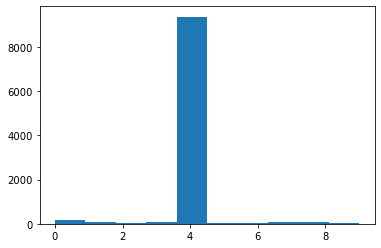

In [13]:
plt.hist(secilenler)